https://stepik.org/lesson/1370054/step/1

In [ ]:
# https://youtu.be/4z8VSsvZGKs?si=8_oqtkNrKfLNEnq6
# https://github.com/selfedu-rus/machine_learning

import numpy as np
import matplotlib.pyplot as plt

x_train = np.array([[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]])
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

n_train = len(x_train)                          # размер обучающей выборки
w = [0, -1]                                     # начальное значение вектора w

a = lambda x: np.sign(x[0]*w[0] + x[1]*w[1])    # решающее правило a(x)

N = 50                                          # максимальное число итераций
L = 0.1                                         # шаг изменения веса
e = 0.1                                         # небольшая добавка для w0 чтобы был зазор между разделяющей линией и граничным образом

last_error_index = -1                           # индекс последнего ошибочного наблюдения

for n in range(N):
    for i in range(n_train):                # перебор по наблюдениям
        if y_train[i] * a(x_train[i]) < 0:  # если ошибка классификации,
            w[0] = w[0] + L * y_train[i]    # то корректировка веса w0
            last_error_index = i

    Q = sum([1 for i in range(n_train) if y_train[i] * a(x_train[i]) < 0])
    if Q == 0:      # показатель качества классификации (число ошибок)
        break       # останов, если все верно классифицируем

if last_error_index > -1:
    w[0] = w[0] + e * y_train[last_error_index]

print(w)

[1.6000000000000003, -1]


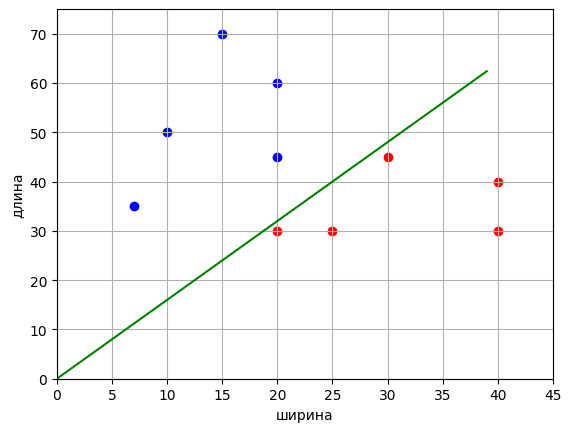

In [ ]:
line_x = list(range(max(x_train[:, 0])))    # формирование графика разделяющей линии
line_y = [w[0]*x for x in line_x]

x_0 = x_train[y_train == 1]                 # формирование точек для 1-го
x_1 = x_train[y_train == -1]                # и 2-го классов

plt.scatter(x_0[:, 0], x_0[:, 1], color='red')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')
plt.plot(line_x, line_y, color='green')

plt.xlim([0, 45])
plt.ylim([0, 75])
plt.ylabel("длина")
plt.xlabel("ширина")
plt.grid(True)
plt.show()